# This notebook gives insight over the dataset

## Imports

In [1]:
import pandas as pd
from essay_evaluation.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm.notebook import tqdm
from collections import defaultdict, OrderedDict
import matplotlib

## Set paths

In [2]:

final_dataset_path = "/usr/local/datasets/flip_final.csv"

In [3]:
df = pd.read_csv(final_dataset_path)

In [4]:
df = df.replace(np.nan, '', regex=True)#Replace empty fields from nan to a ''
#Filter empty essays, session 1, 3, 5
df = df.query("Essay != '' and Session != 'Session 1' and Session != 'Session 3' and Session != 'Session 5'and Vocab_Grade_1st != '' and Vocab_Grade_2nd != ''")

In [5]:
res = set()

for idx, row in df.iterrows():
    res.add(row["Vocab_Grade_1st"])
    res.add(row["Vocab_Grade_2nd"])


## Grade distribution

### Add Vocab avg grade

In [6]:
vocab_1 = np.array(df['Vocab_Grade_1st'])
vocab_2 = np.array(df['Vocab_Grade_2nd'])
mean = (vocab_1 + vocab_2)/2
df['Vocab_Grade_AVG'] = mean


### Grade distribution overall

In [7]:
grade_count = defaultdict(lambda : 0)
a1 = defaultdict(lambda : 0)
a2 = defaultdict(lambda : 0)
b1 = defaultdict(lambda : 0)
b2 = defaultdict(lambda : 0)
c1 = defaultdict(lambda : 0)


for idx, row in df.iterrows():
    grade_count[row["Vocab_Grade_AVG"]] += 1
    
    if row['Level'] == "A1.1" or row['Level'] == "A1.2":
        a1[row["Vocab_Grade_AVG"]] += 1
    elif row['Level'] == "A2.1" or row['Level'] == "A2.2":
        a2[row["Vocab_Grade_AVG"]] += 1
    elif row['Level'] == "B1.1" or row['Level'] == "B1.2":
        b1[row["Vocab_Grade_AVG"]] += 1
    elif row['Level'] == "B2.1" or row['Level'] == "B2.2":
        b2[row["Vocab_Grade_AVG"]] += 1
    elif row['Level'] == "C1.1" or row['Level'] == "C1.2":
        c1[row["Vocab_Grade_AVG"]] += 1




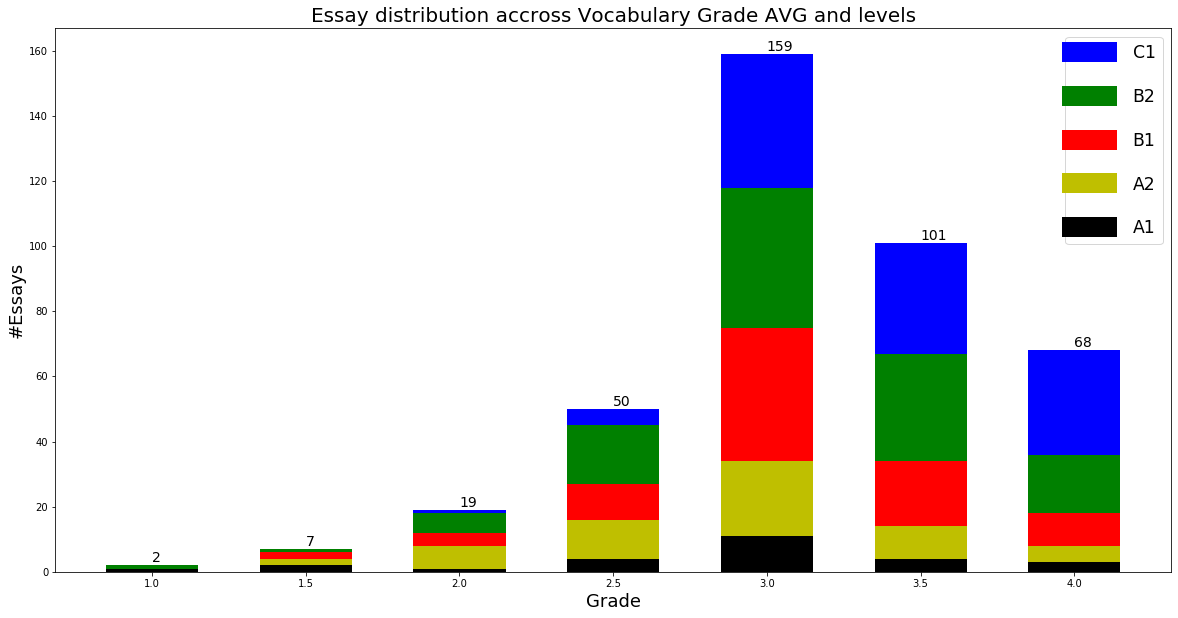

In [8]:
from numpy import array as arr
from matplotlib.lines import Line2D
#bottom_c1 = np.array(list(b2.values()))+np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b2 = np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b1 = np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_a2 = np.array(list(a1.values()))

matplotlib.rc('figure', figsize=(20, 10))
plt.xticks(list(grade_count.keys()), list(grade_count.keys()))
for key, value in grade_count.items():
    if key == 0:
        continue
    plt.text(key, value+1, value, fontdict={"size": 14})
plt.grid(which='major', linestyle='', linewidth='0.5', color='green')
#plt.bar(grade_count.keys(), height=grade_count.values(), align='center', width=0.3)

for key in [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]:
    plt.bar(key, height=c1[key], align='center', width=0.3, bottom=b2[key]+b1[key]+a2[key]+a1[key], color='b')
    plt.bar(key, height=b2[key], align='center', width=0.3, bottom=b1[key]+a2[key]+a1[key], color='g')
    plt.bar(key, height=b1[key], align='center', width=0.3, bottom=a2[key]+a1[key], color='r')
    plt.bar(key, height=a2[key], align='center', width=0.3, bottom=a1[key], color='y')
    plt.bar(key, height=a1[key], align='center', width=0.3, color='k')

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#plt.bar(c1.keys(), height=c1.values(), align='center', width=0.3, bottom=bottom_c1, label="C1")
#plt.bar(b2.keys(), height=b2.values(), align='center', width=0.3, bottom=bottom_b2, label="B2")
#plt.bar(b1.keys(), height=b1.values(), align='center', width=0.3, bottom=bottom_b1, label="B1")
#plt.bar(a2.keys(), height=a2.values(), align='center', width=0.3, bottom=bottom_a2, label="A2")
#plt.bar(a1.keys(), height=a1.values(), align='center', width=0.3, label="A1")

custom_lines = [Line2D([0], [0], color='b', lw=20),
                Line2D([0], [0], color='g', lw=20),
                Line2D([0], [0], color='r', lw=20),
                Line2D([0], [0], color='y', lw=20),
                Line2D([0], [0], color='k', lw=20)]

plt.legend(custom_lines, ['C1', 'B2', 'B1', 'A2', 'A1'], labelspacing=1.5, handletextpad=1.5, fontsize='xx-large')#.legend()
plt.title("Essay distribution accross Vocabulary Grade AVG and levels", fontdict={"size": 20})
plt.xlabel("Grade", fontdict={"size": 18})
plt.ylabel("#Essays", fontdict={"size": 18})
plt.show()

### Add Overall grade

In [9]:
grade_1 = np.array(df['Overall_Grade_1st'])
grade_2 = np.array(df['Overall_Grade_2nd'])
mean = (grade_1 + grade_2)/2
df['Overall_Grade_AVG'] = mean

In [10]:
grade_count = defaultdict(lambda : 0)
a1 = defaultdict(lambda : 0)
a2 = defaultdict(lambda : 0)
b1 = defaultdict(lambda : 0)
b2 = defaultdict(lambda : 0)
c1 = defaultdict(lambda : 0)


for idx, row in df.iterrows():
    grade_count[row["Overall_Grade_AVG"]] += 1
    
    if row['Level'] == "A1.1" or row['Level'] == "A1.2":
        a1[row["Overall_Grade_AVG"]] += 1
    elif row['Level'] == "A2.1" or row['Level'] == "A2.2":
        a2[row["Overall_Grade_AVG"]] += 1
    elif row['Level'] == "B1.1" or row['Level'] == "B1.2":
        b1[row["Overall_Grade_AVG"]] += 1
    elif row['Level'] == "B2.1" or row['Level'] == "B2.2":
        b2[row["Overall_Grade_AVG"]] += 1
    elif row['Level'] == "C1.1" or row['Level'] == "C1.2":
        c1[row["Overall_Grade_AVG"]] += 1



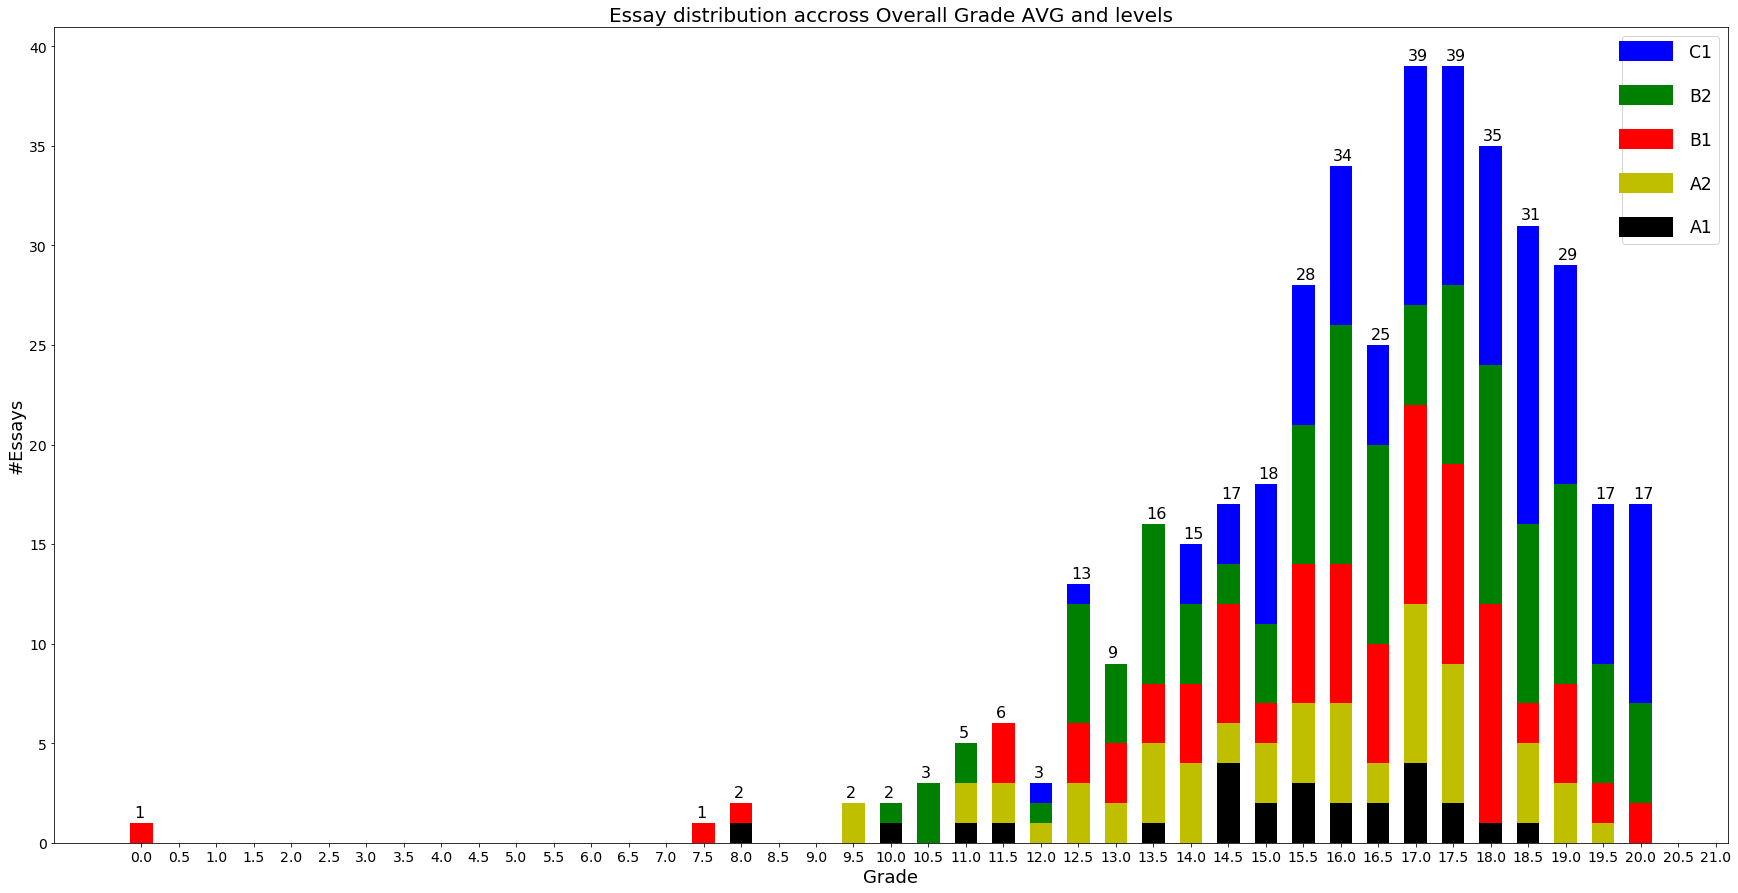

In [11]:

from numpy import array as arr
from matplotlib.lines import Line2D
#bottom_c1 = np.array(list(b2.values()))+np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b2 = np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b1 = np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_a2 = np.array(list(a1.values()))

matplotlib.rc('figure', figsize=(30, 15))
plt.xticks(np.arange(0, 22, 0.5), np.arange(0, 22, 0.5))
for key, value in grade_count.items():
    plt.text(key-0.1, value+0.3, value, fontdict={"size": 16})
plt.grid(which='major', linestyle='', linewidth='0.5', color='green')
#plt.bar(grade_count.keys(), height=grade_count.values(), align='center', width=0.3)

for key in list(grade_count.keys()):
    #if key < 7.0:
    #    continue
    plt.bar(key, height=c1[key], align='center', width=0.3, bottom=b2[key]+b1[key]+a2[key]+a1[key], color='b')
    plt.bar(key, height=b2[key], align='center', width=0.3, bottom=b1[key]+a2[key]+a1[key], color='g')
    plt.bar(key, height=b1[key], align='center', width=0.3, bottom=a2[key]+a1[key], color='r')
    plt.bar(key, height=a2[key], align='center', width=0.3, bottom=a1[key], color='y')
    plt.bar(key, height=a1[key], align='center', width=0.3, color='k')

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#plt.bar(c1.keys(), height=c1.values(), align='center', width=0.3, bottom=bottom_c1, label="C1")
#plt.bar(b2.keys(), height=b2.values(), align='center', width=0.3, bottom=bottom_b2, label="B2")
#plt.bar(b1.keys(), height=b1.values(), align='center', width=0.3, bottom=bottom_b1, label="B1")
#plt.bar(a2.keys(), height=a2.values(), align='center', width=0.3, bottom=bottom_a2, label="A2")
#plt.bar(a1.keys(), height=a1.values(), align='center', width=0.3, label="A1")

custom_lines = [Line2D([0], [0], color='b', lw=20),
                Line2D([0], [0], color='g', lw=20),
                Line2D([0], [0], color='r', lw=20),
                Line2D([0], [0], color='y', lw=20),
                Line2D([0], [0], color='k', lw=20)]

plt.legend(custom_lines, ['C1', 'B2', 'B1', 'A2', 'A1'], labelspacing=1.5, handletextpad=1.5, fontsize='xx-large')#.legend()
plt.title("Essay distribution accross Overall Grade AVG and levels", fontdict={"size": 20})
plt.xlabel("Grade", fontdict={"size": 18})
plt.ylabel("#Essays", fontdict={"size": 18})
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.show()

In [12]:
df.query("Overall_Grade_AVG == 20 and (Level == 'A1.1' or Level == 'A1.2')")

,Unnamed: 0,Session,Student,Email,Level,Prompt,Prompt_Description,Essay,Essay Original,Overall_Grade_1st,...,Grammar_Grade_2nd,Mechanics_Grade_2nd,Graded_By_2nd,Overall_Grade_AVG,Content_Grade_AVG,Organiz_Grade_AVG,Vocab_Grade_AVG,Grammar_Grade_AVG,Mechanics_Grade_AVG,Word Count


### Add Vocabulary + Grammar Grade

In [13]:
grade_1 = np.array(df['Vocab_Grade_1st']) + np.array(df['Grammar_Grade_1st'])
grade_2 = np.array(df['Vocab_Grade_2nd']) + np.array(df['Grammar_Grade_2nd'])
mean = (grade_1 + grade_2)/2
df['Vocab_Grammar_Grade_AVG'] = mean

In [14]:
grade_count = defaultdict(lambda : 0)
a1 = defaultdict(lambda : 0)
a2 = defaultdict(lambda : 0)
b1 = defaultdict(lambda : 0)
b2 = defaultdict(lambda : 0)
c1 = defaultdict(lambda : 0)


for idx, row in df.iterrows():
    grade_count[row["Vocab_Grammar_Grade_AVG"]] += 1
    
    if row['Level'] == "A1.1" or row['Level'] == "A1.2":
        a1[row["Vocab_Grammar_Grade_AVG"]] += 1
    elif row['Level'] == "A2.1" or row['Level'] == "A2.2":
        a2[row["Vocab_Grammar_Grade_AVG"]] += 1
    elif row['Level'] == "B1.1" or row['Level'] == "B1.2":
        b1[row["Vocab_Grammar_Grade_AVG"]] += 1
    elif row['Level'] == "B2.1" or row['Level'] == "B2.2":
        b2[row["Vocab_Grammar_Grade_AVG"]] += 1
    elif row['Level'] == "C1.1" or row['Level'] == "C1.2":
        c1[row["Vocab_Grammar_Grade_AVG"]] += 1



In [15]:
grade_count

defaultdict(<function __main__.<lambda>()>,
            {5.5: 44,
             3.5: 11,
             6.0: 85,
             7.0: 57,
             4.5: 23,
             5.0: 39,
             8.0: 29,
             6.5: 62,
             4.0: 14,
             7.5: 37,
             3.0: 3,
             0.0: 1,
             2.5: 2})

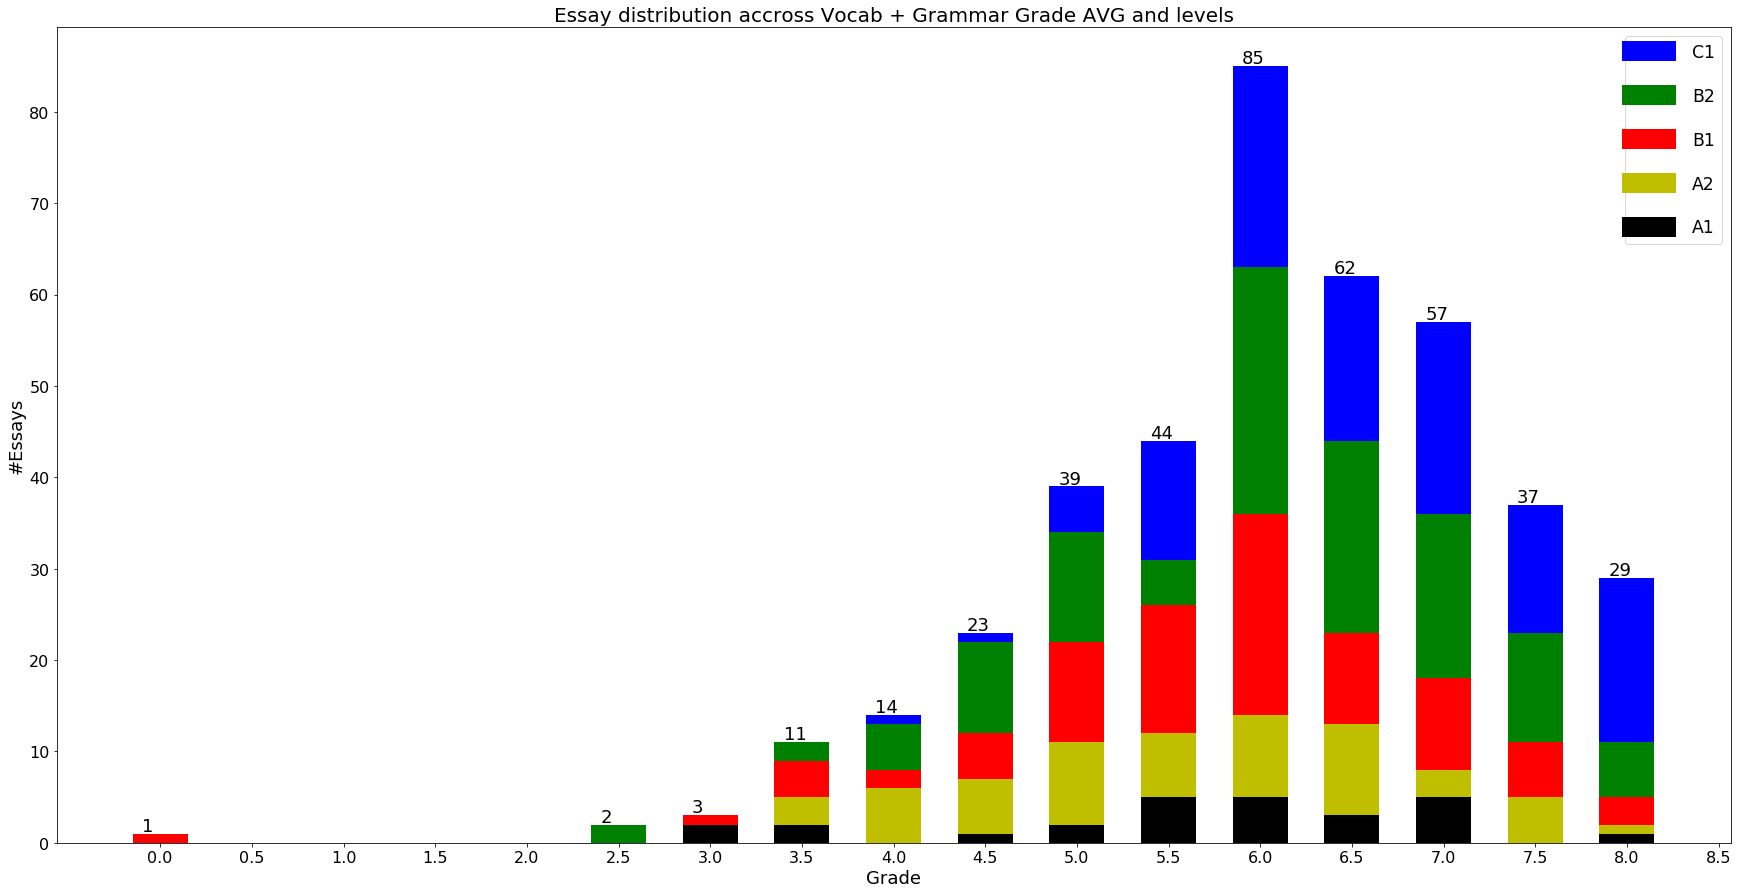

In [16]:

from numpy import array as arr
from matplotlib.lines import Line2D
#bottom_c1 = np.array(list(b2.values()))+np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b2 = np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b1 = np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_a2 = np.array(list(a1.values()))

matplotlib.rc('figure', figsize=(30, 15))
plt.xticks(np.arange(0, 22, 0.5), np.arange(0, 22, 0.5))
for key, value in grade_count.items():
    plt.text(key-0.1, value+0.3, value, fontdict={"size": 18})
plt.grid(which='major', linestyle='', linewidth='0.5', color='green')
#plt.bar(grade_count.keys(), height=grade_count.values(), align='center', width=0.3)

for key in list(grade_count.keys()):
    plt.bar(key, height=c1[key], align='center', width=0.3, bottom=b2[key]+b1[key]+a2[key]+a1[key], color='b')
    plt.bar(key, height=b2[key], align='center', width=0.3, bottom=b1[key]+a2[key]+a1[key], color='g')
    plt.bar(key, height=b1[key], align='center', width=0.3, bottom=a2[key]+a1[key], color='r')
    plt.bar(key, height=a2[key], align='center', width=0.3, bottom=a1[key], color='y')
    plt.bar(key, height=a1[key], align='center', width=0.3, color='k')

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#plt.bar(c1.keys(), height=c1.values(), align='center', width=0.3, bottom=bottom_c1, label="C1")
#plt.bar(b2.keys(), height=b2.values(), align='center', width=0.3, bottom=bottom_b2, label="B2")
#plt.bar(b1.keys(), height=b1.values(), align='center', width=0.3, bottom=bottom_b1, label="B1")
#plt.bar(a2.keys(), height=a2.values(), align='center', width=0.3, bottom=bottom_a2, label="A2")
#plt.bar(a1.keys(), height=a1.values(), align='center', width=0.3, label="A1")

custom_lines = [Line2D([0], [0], color='b', lw=20),
                Line2D([0], [0], color='g', lw=20),
                Line2D([0], [0], color='r', lw=20),
                Line2D([0], [0], color='y', lw=20),
                Line2D([0], [0], color='k', lw=20)]

plt.legend(custom_lines, ['C1', 'B2', 'B1', 'A2', 'A1'], labelspacing=1.5, handletextpad=1.5, fontsize='xx-large')#.legend()
plt.title("Essay distribution accross Vocab + Grammar Grade AVG and levels", fontdict={"size": 20})
plt.xlabel("Grade", fontdict={"size": 18})
plt.ylabel("#Essays", fontdict={"size": 18})
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.show()

### Add Vocabular and Mechanics Grade

In [17]:
grade_1 = np.array(df['Vocab_Grade_1st']) + np.array(df['Mechanics_Grade_1st'])
grade_2 = np.array(df['Vocab_Grade_2nd']) + np.array(df['Mechanics_Grade_2nd'])
mean = (grade_1 + grade_2)/2
df['Vocab_Mechanics_Grade_AVG'] = mean

In [18]:
grade_count = defaultdict(lambda : 0)
a1 = defaultdict(lambda : 0)
a2 = defaultdict(lambda : 0)
b1 = defaultdict(lambda : 0)
b2 = defaultdict(lambda : 0)
c1 = defaultdict(lambda : 0)


for idx, row in df.iterrows():
    grade_count[row["Vocab_Mechanics_Grade_AVG"]] += 1
    
    if row['Level'] == "A1.1" or row['Level'] == "A1.2":
        a1[row["Vocab_Mechanics_Grade_AVG"]] += 1
    elif row['Level'] == "A2.1" or row['Level'] == "A2.2":
        a2[row["Vocab_Mechanics_Grade_AVG"]] += 1
    elif row['Level'] == "B1.1" or row['Level'] == "B1.2":
        b1[row["Vocab_Mechanics_Grade_AVG"]] += 1
    elif row['Level'] == "B2.1" or row['Level'] == "B2.2":
        b2[row["Vocab_Mechanics_Grade_AVG"]] += 1
    elif row['Level'] == "C1.1" or row['Level'] == "C1.2":
        c1[row["Vocab_Mechanics_Grade_AVG"]] += 1



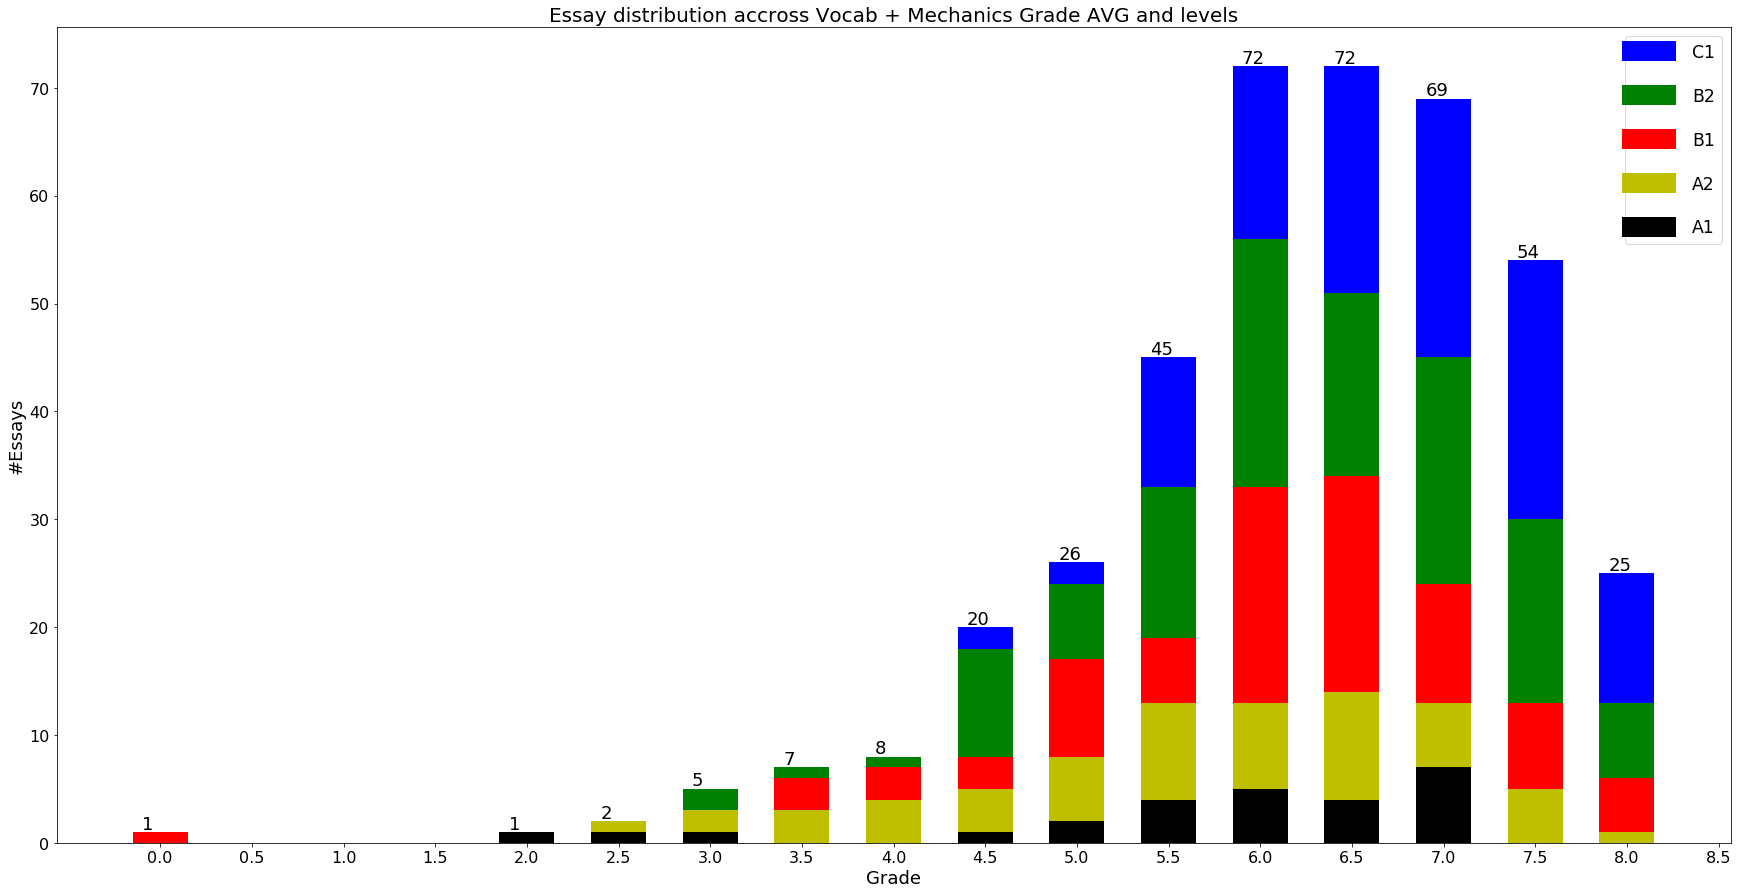

In [19]:

from numpy import array as arr
from matplotlib.lines import Line2D
#bottom_c1 = np.array(list(b2.values()))+np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b2 = np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b1 = np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_a2 = np.array(list(a1.values()))

matplotlib.rc('figure', figsize=(30, 15))
plt.xticks(np.arange(0, 22, 0.5), np.arange(0, 22, 0.5))
for key, value in grade_count.items():
    plt.text(key-0.1, value+0.3, value, fontdict={"size": 18})
plt.grid(which='major', linestyle='', linewidth='0.5', color='green')
#plt.bar(grade_count.keys(), height=grade_count.values(), align='center', width=0.3)

for key in list(grade_count.keys()):
    plt.bar(key, height=c1[key], align='center', width=0.3, bottom=b2[key]+b1[key]+a2[key]+a1[key], color='b')
    plt.bar(key, height=b2[key], align='center', width=0.3, bottom=b1[key]+a2[key]+a1[key], color='g')
    plt.bar(key, height=b1[key], align='center', width=0.3, bottom=a2[key]+a1[key], color='r')
    plt.bar(key, height=a2[key], align='center', width=0.3, bottom=a1[key], color='y')
    plt.bar(key, height=a1[key], align='center', width=0.3, color='k')

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#plt.bar(c1.keys(), height=c1.values(), align='center', width=0.3, bottom=bottom_c1, label="C1")
#plt.bar(b2.keys(), height=b2.values(), align='center', width=0.3, bottom=bottom_b2, label="B2")
#plt.bar(b1.keys(), height=b1.values(), align='center', width=0.3, bottom=bottom_b1, label="B1")
#plt.bar(a2.keys(), height=a2.values(), align='center', width=0.3, bottom=bottom_a2, label="A2")
#plt.bar(a1.keys(), height=a1.values(), align='center', width=0.3, label="A1")

custom_lines = [Line2D([0], [0], color='b', lw=20),
                Line2D([0], [0], color='g', lw=20),
                Line2D([0], [0], color='r', lw=20),
                Line2D([0], [0], color='y', lw=20),
                Line2D([0], [0], color='k', lw=20)]

plt.legend(custom_lines, ['C1', 'B2', 'B1', 'A2', 'A1'], labelspacing=1.5, handletextpad=1.5, fontsize='xx-large')#.legend()
plt.title("Essay distribution accross Vocab + Mechanics Grade AVG and levels", fontdict={"size": 20})
plt.xlabel("Grade", fontdict={"size": 18})
plt.ylabel("#Essays", fontdict={"size": 18})
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.show()

### Add Vocabulary + Organisation Grade AVG

In [20]:
grade_1 = np.array(df['Vocab_Grade_1st']) + np.array(df['Organiz_Grade_1st'])
grade_2 = np.array(df['Vocab_Grade_2nd']) + np.array(df['Organiz_Grade_2nd'])
mean = (grade_1 + grade_2)/2
df['Vocab_Organiz_Grade_AVG'] = mean

In [21]:
grade_count = defaultdict(lambda : 0)
a1 = defaultdict(lambda : 0)
a2 = defaultdict(lambda : 0)
b1 = defaultdict(lambda : 0)
b2 = defaultdict(lambda : 0)
c1 = defaultdict(lambda : 0)


for idx, row in df.iterrows():
    grade_count[row["Vocab_Organiz_Grade_AVG"]] += 1
    
    if row['Level'] == "A1.1" or row['Level'] == "A1.2":
        a1[row["Vocab_Organiz_Grade_AVG"]] += 1
    elif row['Level'] == "A2.1" or row['Level'] == "A2.2":
        a2[row["Vocab_Organiz_Grade_AVG"]] += 1
    elif row['Level'] == "B1.1" or row['Level'] == "B1.2":
        b1[row["Vocab_Organiz_Grade_AVG"]] += 1
    elif row['Level'] == "B2.1" or row['Level'] == "B2.2":
        b2[row["Vocab_Organiz_Grade_AVG"]] += 1
    elif row['Level'] == "C1.1" or row['Level'] == "C1.2":
        c1[row["Vocab_Organiz_Grade_AVG"]] += 1



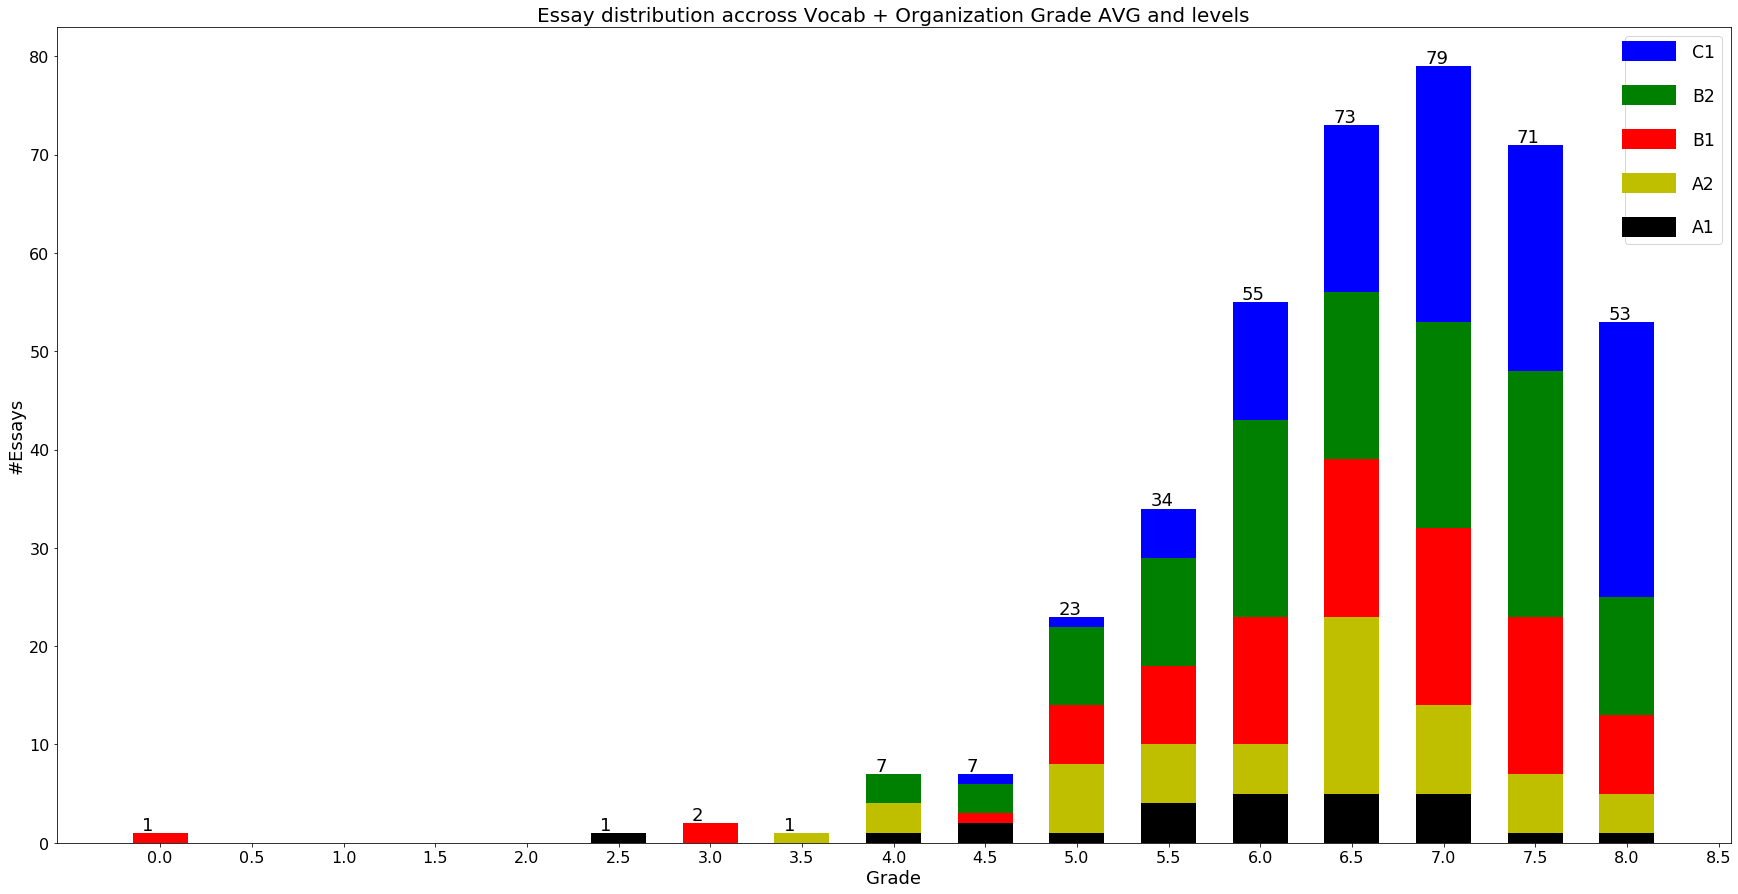

In [22]:

from numpy import array as arr
from matplotlib.lines import Line2D
#bottom_c1 = np.array(list(b2.values()))+np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b2 = np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b1 = np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_a2 = np.array(list(a1.values()))

matplotlib.rc('figure', figsize=(30, 15))
plt.xticks(np.arange(0, 22, 0.5), np.arange(0, 22, 0.5))
for key, value in grade_count.items():
    plt.text(key-0.1, value+0.3, value, fontdict={"size": 18})
plt.grid(which='major', linestyle='', linewidth='0.5', color='green')
#plt.bar(grade_count.keys(), height=grade_count.values(), align='center', width=0.3)

for key in list(grade_count.keys()):
    plt.bar(key, height=c1[key], align='center', width=0.3, bottom=b2[key]+b1[key]+a2[key]+a1[key], color='b')
    plt.bar(key, height=b2[key], align='center', width=0.3, bottom=b1[key]+a2[key]+a1[key], color='g')
    plt.bar(key, height=b1[key], align='center', width=0.3, bottom=a2[key]+a1[key], color='r')
    plt.bar(key, height=a2[key], align='center', width=0.3, bottom=a1[key], color='y')
    plt.bar(key, height=a1[key], align='center', width=0.3, color='k')

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#plt.bar(c1.keys(), height=c1.values(), align='center', width=0.3, bottom=bottom_c1, label="C1")
#plt.bar(b2.keys(), height=b2.values(), align='center', width=0.3, bottom=bottom_b2, label="B2")
#plt.bar(b1.keys(), height=b1.values(), align='center', width=0.3, bottom=bottom_b1, label="B1")
#plt.bar(a2.keys(), height=a2.values(), align='center', width=0.3, bottom=bottom_a2, label="A2")
#plt.bar(a1.keys(), height=a1.values(), align='center', width=0.3, label="A1")

custom_lines = [Line2D([0], [0], color='b', lw=20),
                Line2D([0], [0], color='g', lw=20),
                Line2D([0], [0], color='r', lw=20),
                Line2D([0], [0], color='y', lw=20),
                Line2D([0], [0], color='k', lw=20)]

plt.legend(custom_lines, ['C1', 'B2', 'B1', 'A2', 'A1'], labelspacing=1.5, handletextpad=1.5, fontsize='xx-large')#.legend()
plt.title("Essay distribution accross Vocab + Organization Grade AVG and levels", fontdict={"size": 20})
plt.xlabel("Grade", fontdict={"size": 18})
plt.ylabel("#Essays", fontdict={"size": 18})
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.show()

### Add Vocabulary + Mechanics + Grammar Grade Avg

In [23]:
grade_1 = np.array(df['Vocab_Grade_1st']) + np.array(df['Mechanics_Grade_1st']) + np.array(df['Grammar_Grade_1st'])
grade_2 = np.array(df['Vocab_Grade_2nd']) + np.array(df['Mechanics_Grade_2nd']) + np.array(df['Grammar_Grade_2nd'])
mean = (grade_1 + grade_2)/2
df['Vocab_Mechanics_Grammar_Grade_AVG'] = mean

In [24]:
grade_count = defaultdict(lambda : 0)
a1 = defaultdict(lambda : 0)
a2 = defaultdict(lambda : 0)
b1 = defaultdict(lambda : 0)
b2 = defaultdict(lambda : 0)
c1 = defaultdict(lambda : 0)


for idx, row in df.iterrows():
    grade_count[row["Vocab_Mechanics_Grammar_Grade_AVG"]] += 1
    
    if row['Level'] == "A1.1" or row['Level'] == "A1.2":
        a1[row["Vocab_Mechanics_Grammar_Grade_AVG"]] += 1
    elif row['Level'] == "A2.1" or row['Level'] == "A2.2":
        a2[row["Vocab_Mechanics_Grammar_Grade_AVG"]] += 1
    elif row['Level'] == "B1.1" or row['Level'] == "B1.2":
        b1[row["Vocab_Mechanics_Grammar_Grade_AVG"]] += 1
    elif row['Level'] == "B2.1" or row['Level'] == "B2.2":
        b2[row["Vocab_Mechanics_Grammar_Grade_AVG"]] += 1
    elif row['Level'] == "C1.1" or row['Level'] == "C1.2":
        c1[row["Vocab_Mechanics_Grammar_Grade_AVG"]] += 1



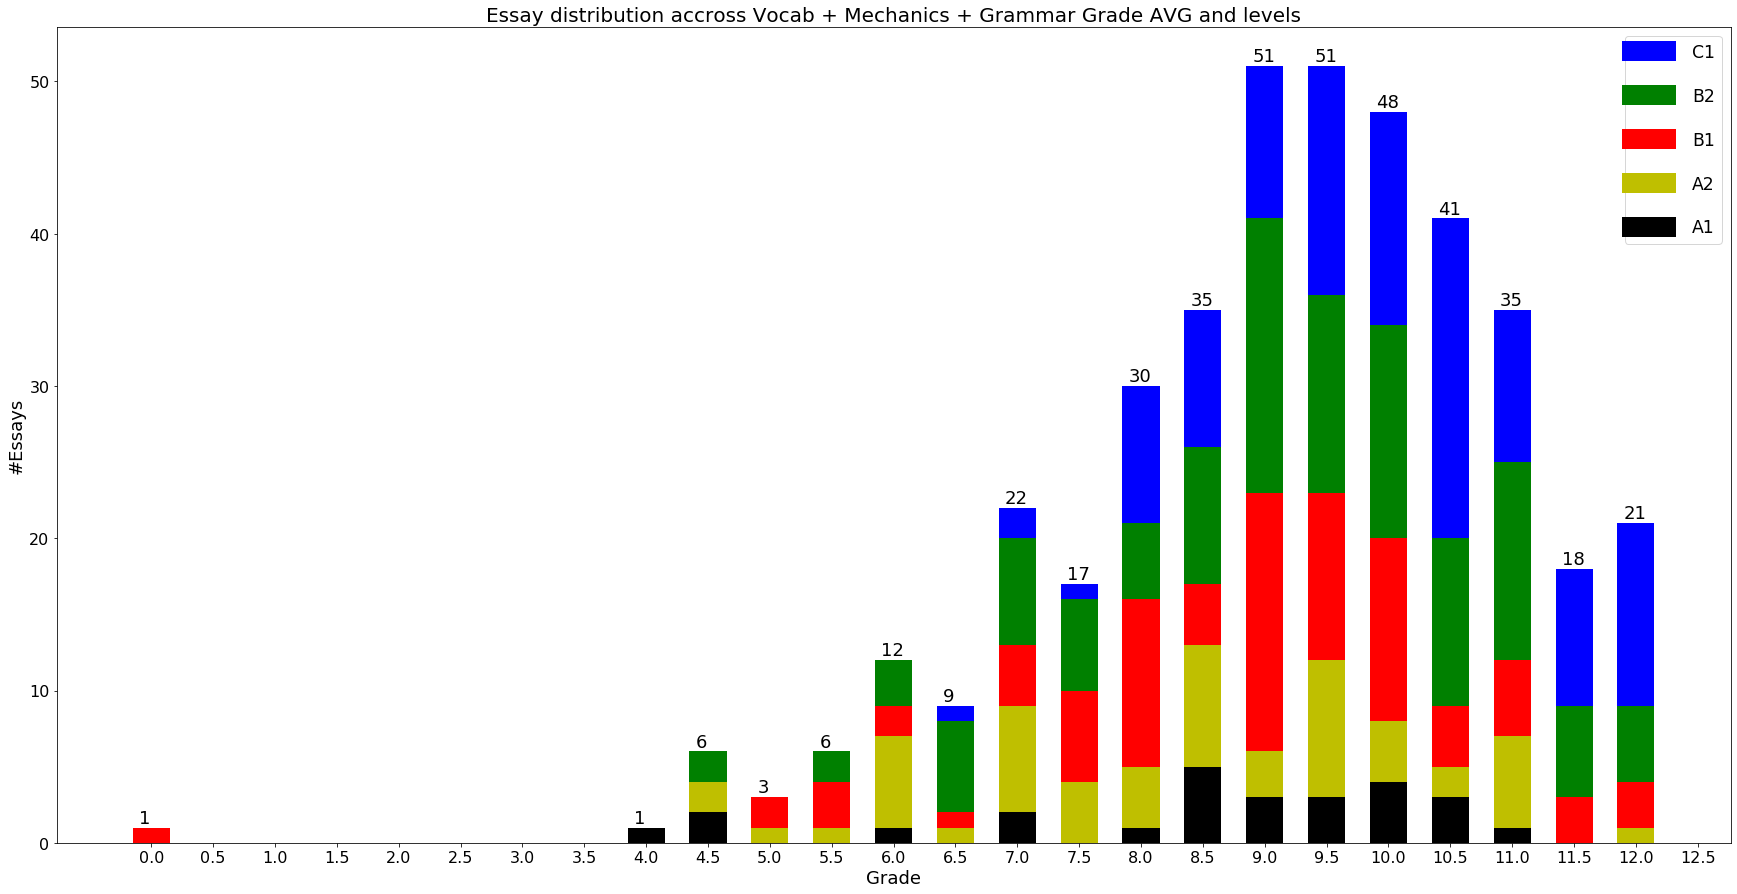

In [25]:

from numpy import array as arr
from matplotlib.lines import Line2D
#bottom_c1 = np.array(list(b2.values()))+np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b2 = np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b1 = np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_a2 = np.array(list(a1.values()))

matplotlib.rc('figure', figsize=(30, 15))
plt.xticks(np.arange(0, 22, 0.5), np.arange(0, 22, 0.5))
for key, value in grade_count.items():
    plt.text(key-0.1, value+0.3, value, fontdict={"size": 18})
plt.grid(which='major', linestyle='', linewidth='0.5', color='green')
#plt.bar(grade_count.keys(), height=grade_count.values(), align='center', width=0.3)

for key in list(grade_count.keys()):
    plt.bar(key, height=c1[key], align='center', width=0.3, bottom=b2[key]+b1[key]+a2[key]+a1[key], color='b')
    plt.bar(key, height=b2[key], align='center', width=0.3, bottom=b1[key]+a2[key]+a1[key], color='g')
    plt.bar(key, height=b1[key], align='center', width=0.3, bottom=a2[key]+a1[key], color='r')
    plt.bar(key, height=a2[key], align='center', width=0.3, bottom=a1[key], color='y')
    plt.bar(key, height=a1[key], align='center', width=0.3, color='k')

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#plt.bar(c1.keys(), height=c1.values(), align='center', width=0.3, bottom=bottom_c1, label="C1")
#plt.bar(b2.keys(), height=b2.values(), align='center', width=0.3, bottom=bottom_b2, label="B2")
#plt.bar(b1.keys(), height=b1.values(), align='center', width=0.3, bottom=bottom_b1, label="B1")
#plt.bar(a2.keys(), height=a2.values(), align='center', width=0.3, bottom=bottom_a2, label="A2")
#plt.bar(a1.keys(), height=a1.values(), align='center', width=0.3, label="A1")

custom_lines = [Line2D([0], [0], color='b', lw=20),
                Line2D([0], [0], color='g', lw=20),
                Line2D([0], [0], color='r', lw=20),
                Line2D([0], [0], color='y', lw=20),
                Line2D([0], [0], color='k', lw=20)]

plt.legend(custom_lines, ['C1', 'B2', 'B1', 'A2', 'A1'], labelspacing=1.5, handletextpad=1.5, fontsize='xx-large')#.legend()
plt.title("Essay distribution accross Vocab + Mechanics + Grammar Grade AVG and levels", fontdict={"size": 20})
plt.xlabel("Grade", fontdict={"size": 18})
plt.ylabel("#Essays", fontdict={"size": 18})
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.show()

### Add Vocabulary + Mechanics + Grammar + Organisation Grade

In [26]:
grade_1 = np.array(df['Vocab_Grade_1st']) + np.array(df['Mechanics_Grade_1st']) + np.array(df['Grammar_Grade_1st']) + np.array(df['Organiz_Grade_1st'])
grade_2 = np.array(df['Vocab_Grade_2nd']) + np.array(df['Mechanics_Grade_2nd']) + np.array(df['Grammar_Grade_2nd']) + np.array(df['Organiz_Grade_2nd'])
mean = (grade_1 + grade_2)/2
df['Vocab_Mechanics_Grammar_Organiz_Grade_AVG'] = mean

In [27]:
grade_count = defaultdict(lambda : 0)
a1 = defaultdict(lambda : 0)
a2 = defaultdict(lambda : 0)
b1 = defaultdict(lambda : 0)
b2 = defaultdict(lambda : 0)
c1 = defaultdict(lambda : 0)


for idx, row in df.iterrows():
    grade_count[row["Vocab_Mechanics_Grammar_Organiz_Grade_AVG"]] += 1
    
    if row['Level'] == "A1.1" or row['Level'] == "A1.2":
        a1[row["Vocab_Mechanics_Grammar_Organiz_Grade_AVG"]] += 1
    elif row['Level'] == "A2.1" or row['Level'] == "A2.2":
        a2[row["Vocab_Mechanics_Grammar_Organiz_Grade_AVG"]] += 1
    elif row['Level'] == "B1.1" or row['Level'] == "B1.2":
        b1[row["Vocab_Mechanics_Grammar_Organiz_Grade_AVG"]] += 1
    elif row['Level'] == "B2.1" or row['Level'] == "B2.2":
        b2[row["Vocab_Mechanics_Grammar_Organiz_Grade_AVG"]] += 1
    elif row['Level'] == "C1.1" or row['Level'] == "C1.2":
        c1[row["Vocab_Mechanics_Grammar_Organiz_Grade_AVG"]] += 1



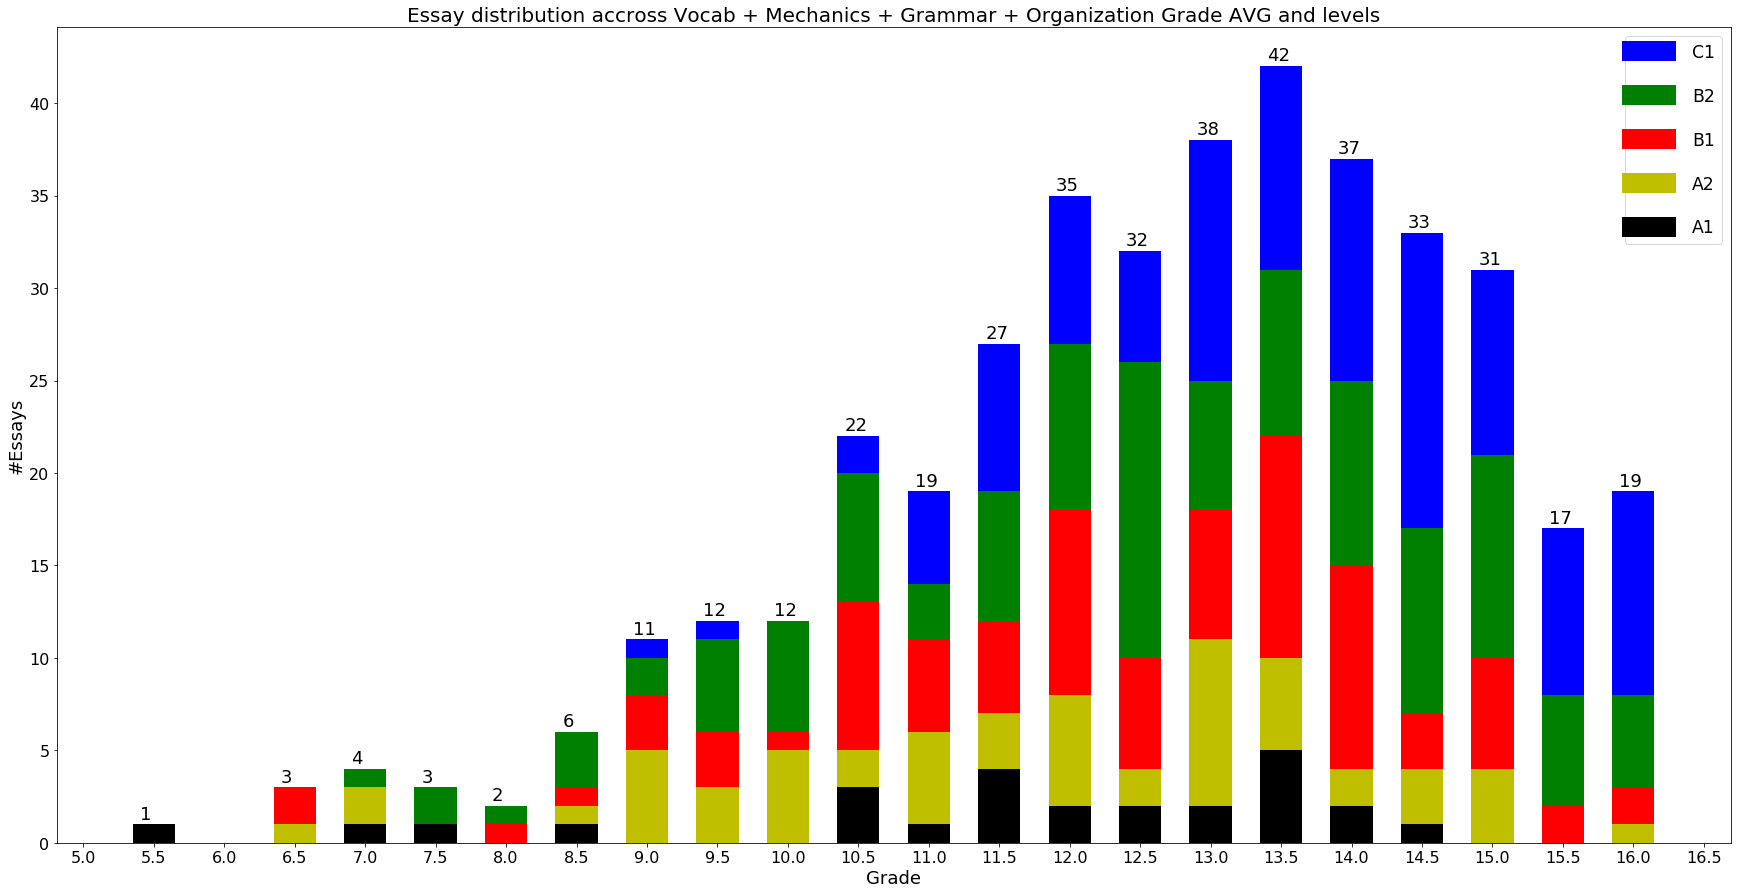

In [28]:

from numpy import array as arr
from matplotlib.lines import Line2D
#bottom_c1 = np.array(list(b2.values()))+np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b2 = np.array(list(b1.values()))+np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_b1 = np.array(list(a2.values()))+np.array(list(a1.values()))
#bottom_a2 = np.array(list(a1.values()))

matplotlib.rc('figure', figsize=(30, 15))
plt.xticks(np.arange(0, 22, 0.5), np.arange(0, 22, 0.5))
for key, value in grade_count.items():
    if key == 0.0:
        continue
    plt.text(key-0.1, value+0.3, value, fontdict={"size": 18})
plt.grid(which='major', linestyle='', linewidth='0.5', color='green')
#plt.bar(grade_count.keys(), height=grade_count.values(), align='center', width=0.3)

for key in list(grade_count.keys()):
    if key < 5.0:
        continue
    plt.bar(key, height=c1[key], align='center', width=0.3, bottom=b2[key]+b1[key]+a2[key]+a1[key], color='b')
    plt.bar(key, height=b2[key], align='center', width=0.3, bottom=b1[key]+a2[key]+a1[key], color='g')
    plt.bar(key, height=b1[key], align='center', width=0.3, bottom=a2[key]+a1[key], color='r')
    plt.bar(key, height=a2[key], align='center', width=0.3, bottom=a1[key], color='y')
    plt.bar(key, height=a1[key], align='center', width=0.3, color='k')

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
#plt.bar(c1.keys(), height=c1.values(), align='center', width=0.3, bottom=bottom_c1, label="C1")
#plt.bar(b2.keys(), height=b2.values(), align='center', width=0.3, bottom=bottom_b2, label="B2")
#plt.bar(b1.keys(), height=b1.values(), align='center', width=0.3, bottom=bottom_b1, label="B1")
#plt.bar(a2.keys(), height=a2.values(), align='center', width=0.3, bottom=bottom_a2, label="A2")
#plt.bar(a1.keys(), height=a1.values(), align='center', width=0.3, label="A1")

custom_lines = [Line2D([0], [0], color='b', lw=20),
                Line2D([0], [0], color='g', lw=20),
                Line2D([0], [0], color='r', lw=20),
                Line2D([0], [0], color='y', lw=20),
                Line2D([0], [0], color='k', lw=20)]

plt.legend(custom_lines, ['C1', 'B2', 'B1', 'A2', 'A1'], labelspacing=1.5, handletextpad=1.5, fontsize='xx-large')#.legend()
plt.title("Essay distribution accross Vocab + Mechanics + Grammar + Organization Grade AVG and levels", fontdict={"size": 20})
plt.xlabel("Grade", fontdict={"size": 18})
plt.ylabel("#Essays", fontdict={"size": 18})
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.show()

### Sentence percentile (across levels)

In [29]:
texts = list(df["Essay"])
pipeline = Pipeline()
docs = []

for text in tqdm(texts):
    if str(text) == 'nan':
        continue
    docs.append(pipeline(text))

sent_num = []
token_num = []

for doc in tqdm(docs):
    cnt = 0
    for sent in doc.sents:
        cnt += 1
    sent_num.append(cnt)
    token_num.append(len(doc))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
inside_text_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16
}

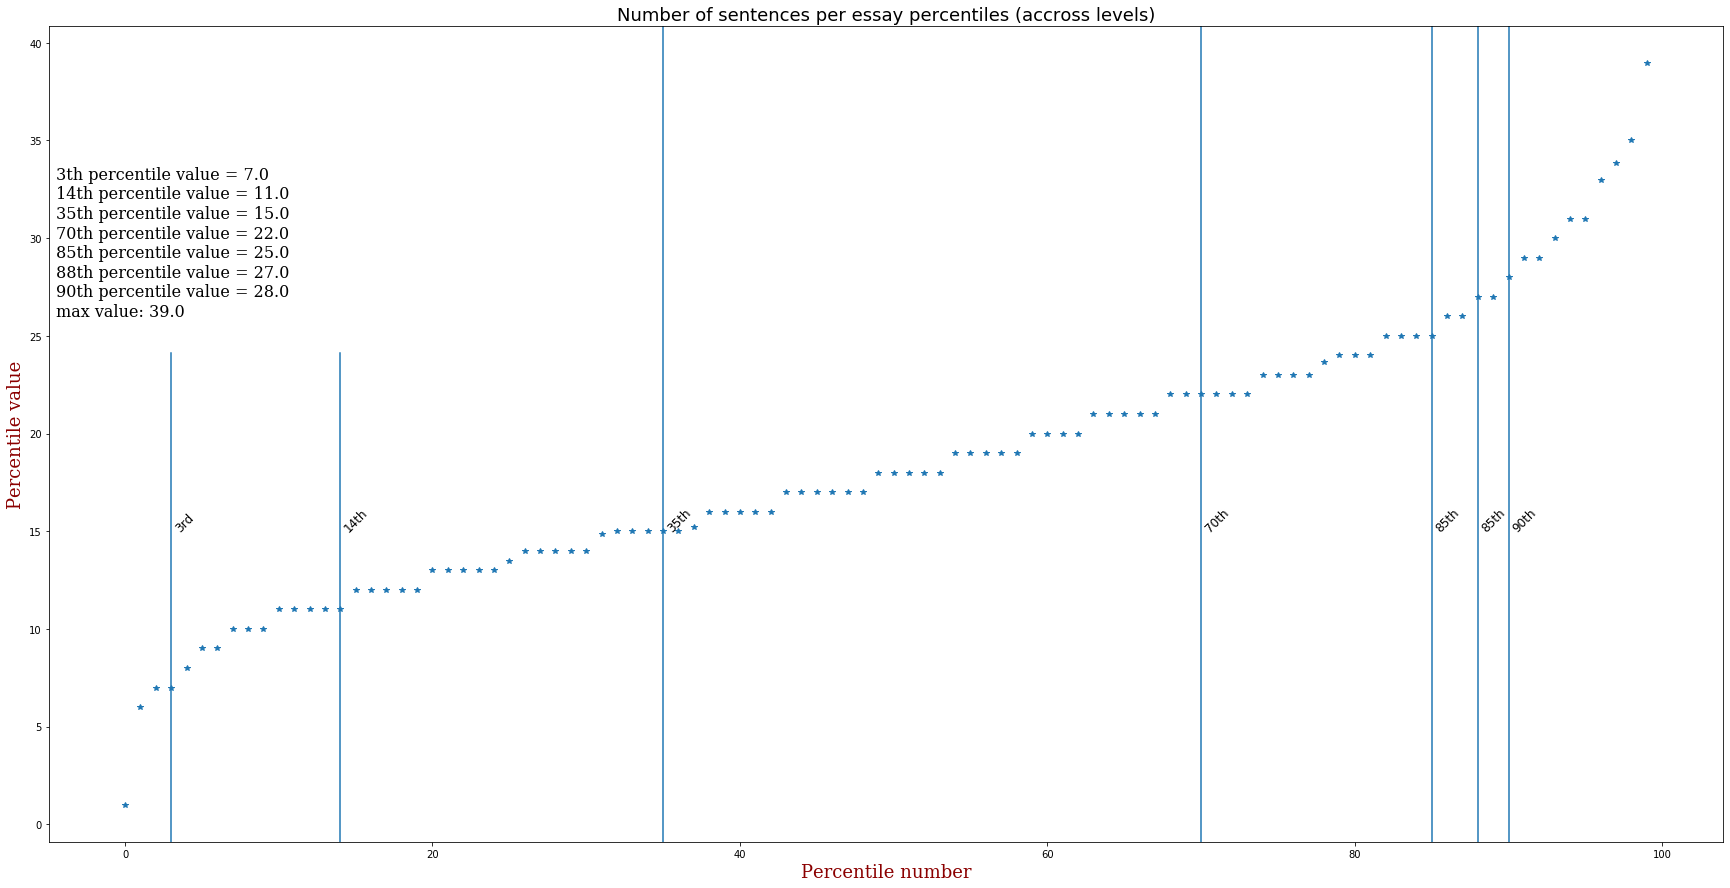

In [30]:
sent_num = np.array(sent_num)
percentiles = []

for i in range(100):
    percentiles.append(np.percentile(sent_num, i))

plt.plot(np.arange(len(percentiles)), percentiles, '*', label="percentiles")
plt.title("Number of sentences per essay percentiles (accross levels)", fontdict={"size":18})
plt.xlabel("Percentile number", fontdict=font)
plt.ylabel("Percentile value", fontdict=font)
plt.axvline(x=3, ymax=0.6)
plt.text(3.1, 15, rotation=45, s="3rd", fontdict={"size": 12})
plt.axvline(x=14, ymax=0.6)
plt.text(14.1, 15, rotation=45, s="14th", fontdict={"size": 12})
plt.axvline(x=35)
plt.text(35.1, 15, rotation=45, s="35th", fontdict={"size": 12})
plt.axvline(x=70)
plt.text(70.1, 15, rotation=45, s="70th", fontdict={"size": 12})
plt.axvline(x=85)
plt.text(85.1, 15, rotation=45, s="85th", fontdict={"size": 12})
plt.axvline(x=88)
plt.text(88.1, 15, rotation=45, s="85th", fontdict={"size": 12})
plt.axvline(x=90)
plt.text(90.1, 15, rotation=45, s="90th", fontdict={"size": 12})

extra_info = f"""
3th percentile value = {percentiles[3]}
14th percentile value = {percentiles[14]}
35th percentile value = {percentiles[35]}
70th percentile value = {round(percentiles[70], 2)}
85th percentile value = {percentiles[85]}
88th percentile value = {percentiles[88]}
90th percentile value = {percentiles[90]}
max value: {round(percentiles[99])}
"""
plt.text(x=-4.5, y=25, s=extra_info, fontdict=inside_text_font)
plt.show()

### Token percentile (across levels)

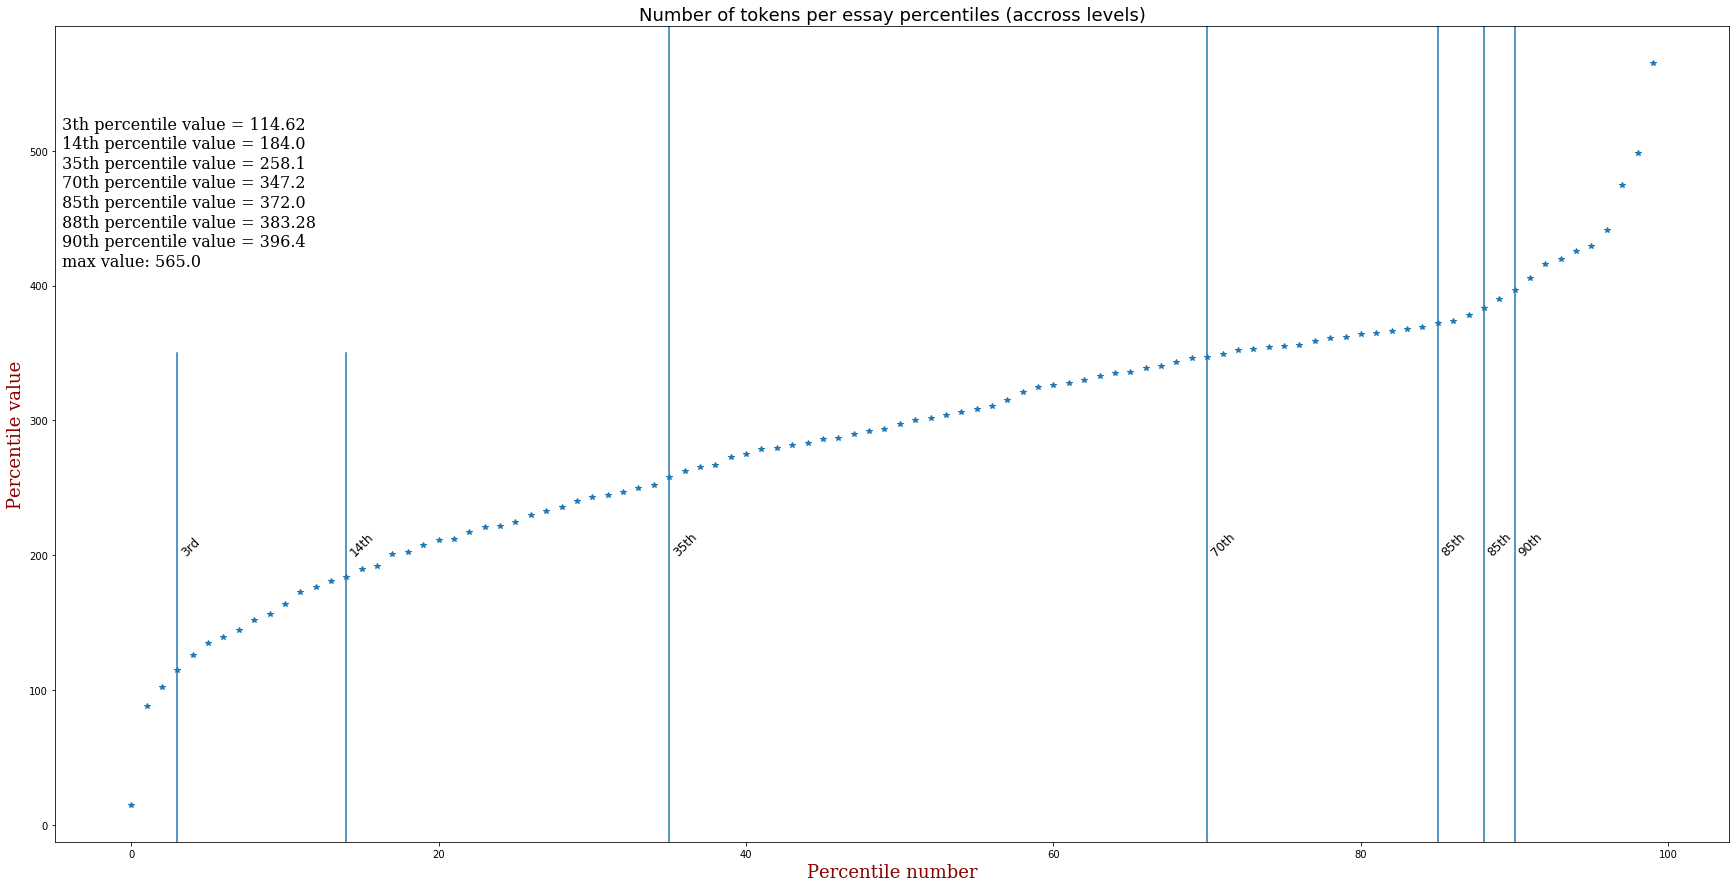

In [31]:
token_num = np.array(token_num)
percentiles = []

for i in range(100):
    percentiles.append(np.percentile(token_num, i))

plt.plot(np.arange(len(percentiles)), percentiles, '*', label="percentiles")
plt.title("Number of tokens per essay percentiles (accross levels)", fontdict={"size":18})
plt.xlabel("Percentile number", fontdict=font)
plt.ylabel("Percentile value", fontdict=font)
plt.axvline(x=3, ymax=0.6)
plt.text(3.1, 200, rotation=45, s="3rd", fontdict={"size": 12})
plt.axvline(x=14, ymax=0.6)
plt.text(14.1, 200, rotation=45, s="14th", fontdict={"size": 12})
plt.axvline(x=35)
plt.text(35.1, 200, rotation=45, s="35th", fontdict={"size": 12})
plt.axvline(x=70)
plt.text(70.1, 200, rotation=45, s="70th", fontdict={"size": 12})
plt.axvline(x=85)
plt.text(85.1, 200, rotation=45, s="85th", fontdict={"size": 12})
plt.axvline(x=88)
plt.text(88.1, 200, rotation=45, s="85th", fontdict={"size": 12})
plt.axvline(x=90)
plt.text(90.1, 200, rotation=45, s="90th", fontdict={"size": 12})

extra_info = f"""
3th percentile value = {round(percentiles[3], 2)}
14th percentile value = {round(percentiles[14], 2)}
35th percentile value = {round(percentiles[35], 2)}
70th percentile value = {round(percentiles[70], 2)}
85th percentile value = {round(percentiles[85], 2)}
88th percentile value = {round(percentiles[88], 2)}
90th percentile value = {round(percentiles[90], 2)}
max value: {round(percentiles[99])}
"""
plt.text(x=-4.5, y=400, s=extra_info, fontdict=inside_text_font)
plt.show()

### Token by level

In [32]:
levels = list(df['Level'])
for idx, row in enumerate(levels):
    if row == 'A1.1' or row == 'A1.2':
        levels[idx] = 'A1'
    elif row == 'A2.1' or row == 'A2.2':
        levels[idx] = 'A2'
    elif row == 'B1.1' or row == 'B1.2':
        levels[idx] = 'B1'
    elif row == 'B2.1' or row == 'B2.2':
        levels[idx] = 'B2'
    elif row == 'C1.1' or row == 'C1.2':
        levels[idx] = 'C1'
len(levels)

407

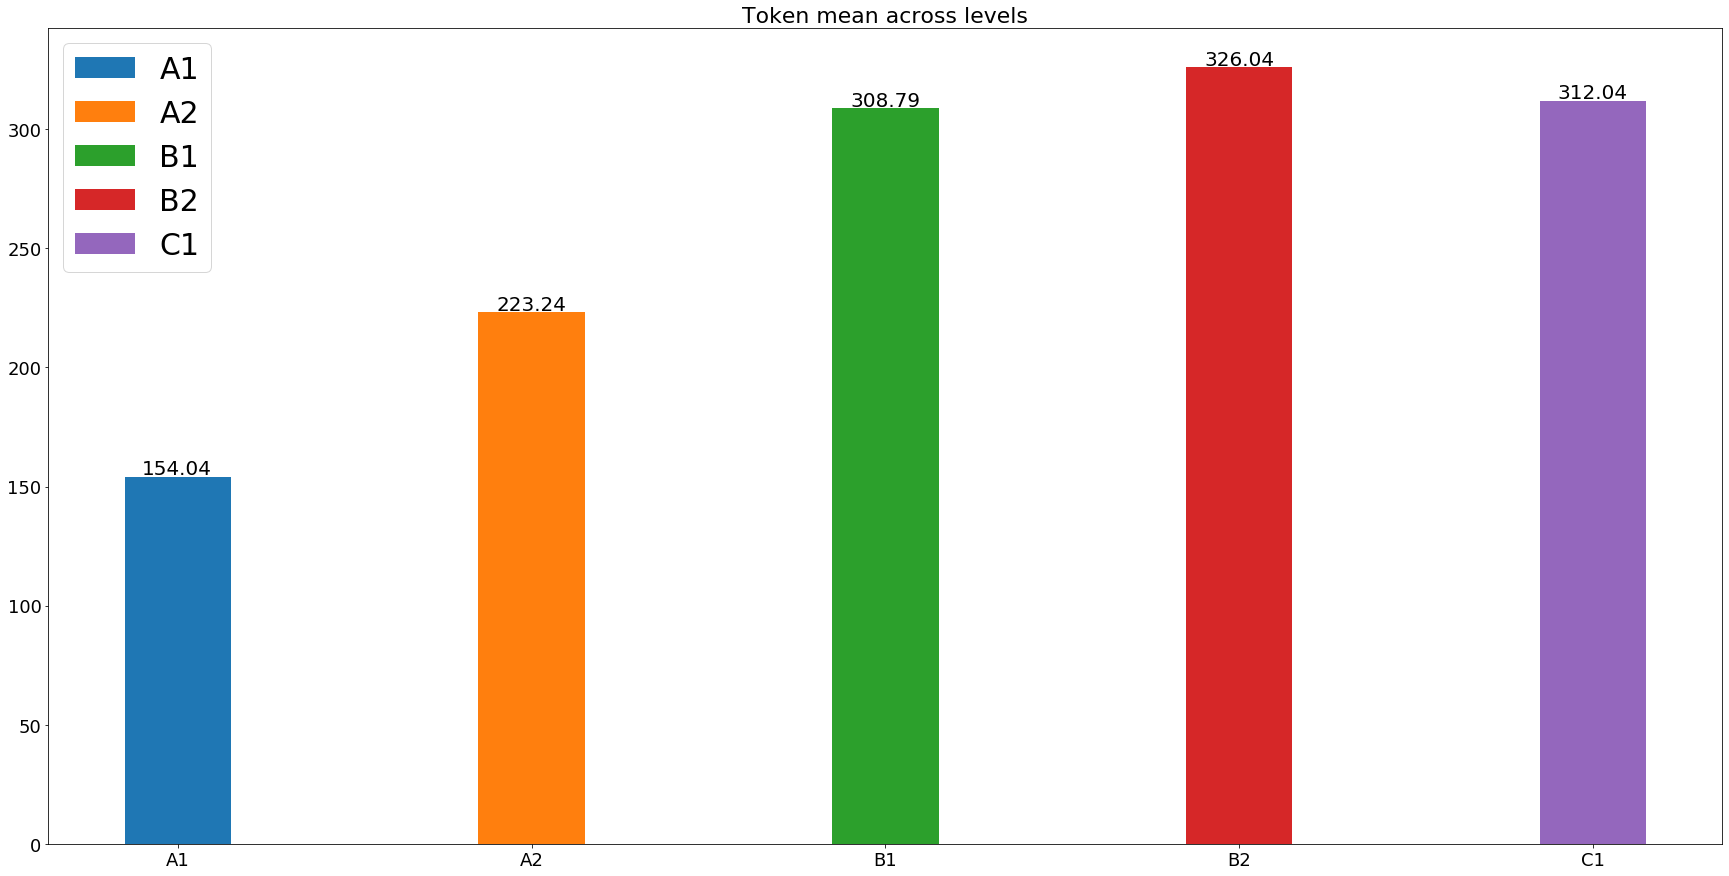

In [33]:
a1 = token_num[np.array(levels) == 'A1']
a2 = token_num[np.array(levels) == 'A2']
b1 = token_num[np.array(levels) == 'B1']
b2 = token_num[np.array(levels) == 'B2']
c1 = token_num[np.array(levels) == 'C1']
assert (len(a1)+len(a2)+len(b1)+len(b2)+len(c1)) == len(token_num) ## Make sure there is no monkey business

plt.bar(1, np.mean(a1), width=0.3, label='A1')
plt.bar(2, np.mean(a2), width=0.3, label='A2')
plt.bar(3, np.mean(b1), width=0.3, label='B1')
plt.bar(4, np.mean(b2), width=0.3, label='B2')
plt.bar(5, np.mean(c1), width=0.3, label='C1')

plt.text(0.9, np.mean(a1)+1, round(np.mean(a1), 2), fontdict={"size": 20})
plt.text(1.9, np.mean(a2)+1, round(np.mean(a2), 2), fontdict={"size": 20})
plt.text(2.9, np.mean(b1)+1, round(np.mean(b1), 2), fontdict={"size": 20})
plt.text(3.9, np.mean(b2)+1, round(np.mean(b2), 2), fontdict={"size": 20})
plt.text(4.9, np.mean(c1)+1, round(np.mean(c1), 2), fontdict={"size": 20})

plt.xticks([1, 2, 3, 4, 5], labels=['A1', 'A2', 'B1', 'B2', 'C1'])
plt.title("Token mean across levels", fontdict={"size": 22})
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.legend(prop={'size': 30})
plt.show()

In [34]:
#descriptive_statistics = pd.DataFrame(None, columns=['mean', 'std', 'min', 'max', 'median'])
descriptive_statistics_list = []
#a1
descriptive_statistics_list.append(['A1', np.around(np.mean(a1), 2), np.around(np.std(a1), 2), np.min(a1), np.max(a1), np.median(a1)])
#a2
descriptive_statistics_list.append(['A2', np.around(np.mean(a2), 2), np.around(np.std(a2), 2), np.min(a2), np.max(a2), np.median(a2)])
#b1
descriptive_statistics_list.append(['B1', np.around(np.mean(b1), 2), np.around(np.std(b1), 2), np.min(b1), np.max(b1), np.median(b1)])
#b2
descriptive_statistics_list.append(['B2', np.around(np.mean(b2), 2), np.around(np.std(b2), 2), np.min(b2), np.max(b2), np.median(b2)])
#c1
descriptive_statistics_list.append(['C1', np.around(np.mean(c1), 2), np.around(np.std(c1), 2), np.min(c1), np.max(c1), np.median(c1)])

descriptive_statistics = pd.DataFrame(descriptive_statistics_list, columns=['level', 'mean', 'std', 'min', 'max', 'median'])
print("Descriptive statistics for number of tokens accross levels")
descriptive_statistics

Descriptive statistics for number of tokens accross levels


,level,mean,std,min,max,median
0,A1,154.04,56.39,58,314,153.0
1,A2,223.24,85.63,93,545,209.0
2,B1,308.79,96.81,15,720,326.0
3,B2,326.04,85.82,139,620,335.5
4,C1,312.04,72.74,163,629,308.0


### Sentence distribution by level

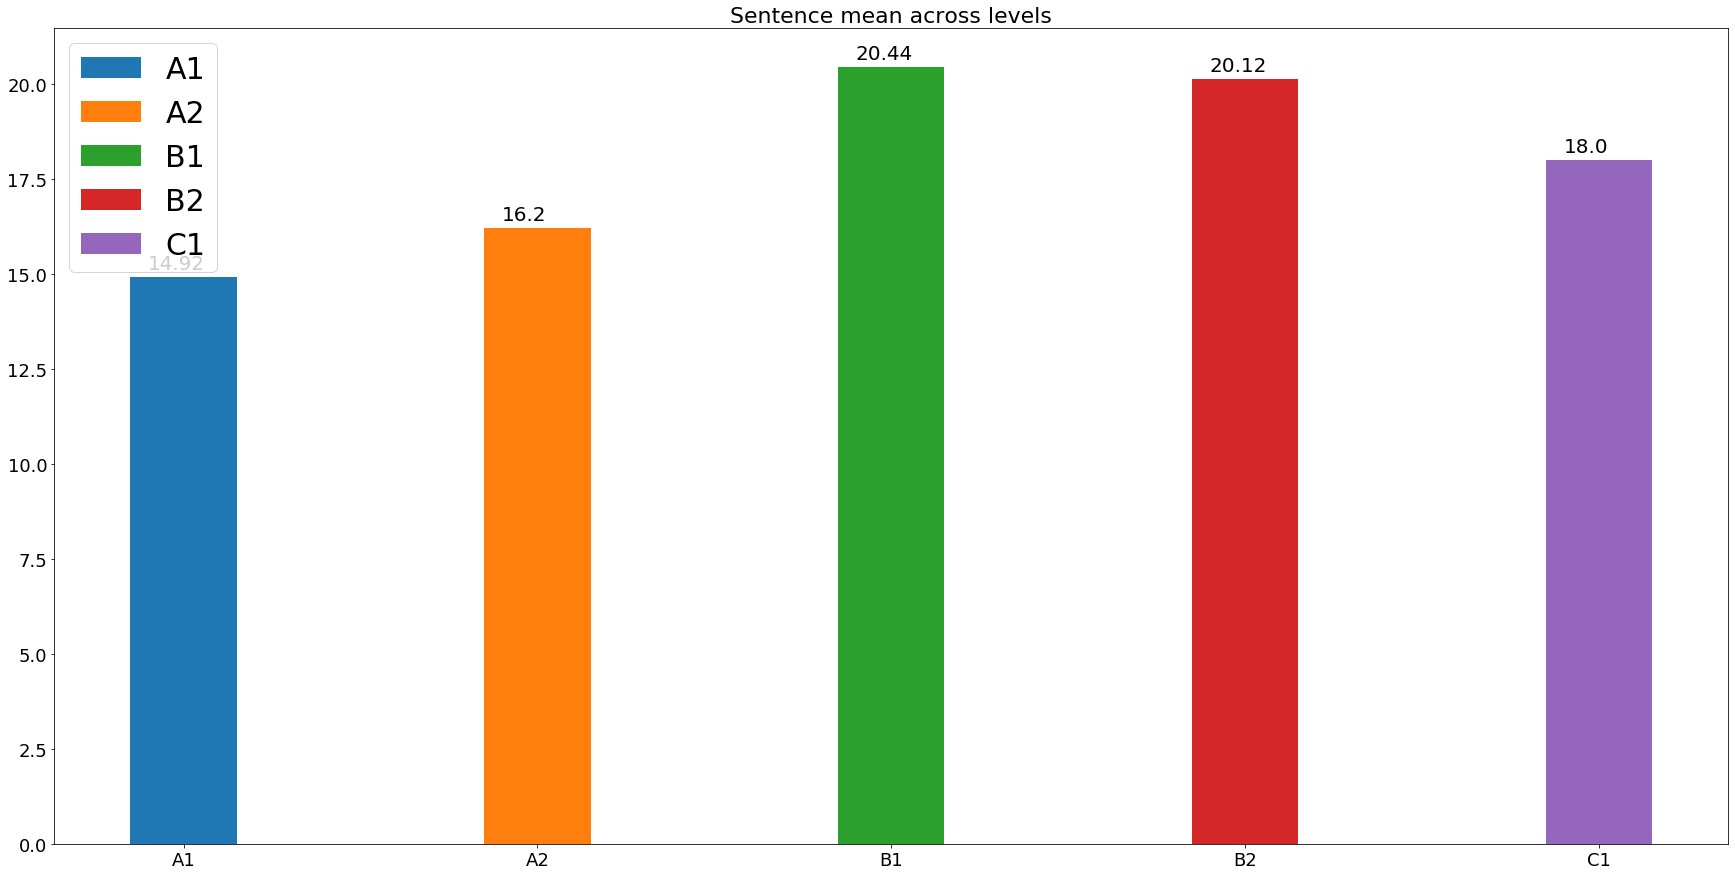

In [35]:
a1 = sent_num[np.array(levels) == 'A1']
a2 = sent_num[np.array(levels) == 'A2']
b1 = sent_num[np.array(levels) == 'B1']
b2 = sent_num[np.array(levels) == 'B2']
c1 = sent_num[np.array(levels) == 'C1']
assert (len(a1)+len(a2)+len(b1)+len(b2)+len(c1)) == len(token_num) ## Make sure there is no monkey business

plt.bar(1, np.mean(a1), width=0.3, label='A1')
plt.bar(2, np.mean(a2), width=0.3, label='A2')
plt.bar(3, np.mean(b1), width=0.3, label='B1')
plt.bar(4, np.mean(b2), width=0.3, label='B2')
plt.bar(5, np.mean(c1), width=0.3, label='C1')

plt.text(0.9, np.mean(a1)+0.2, round(np.mean(a1), 2), fontdict={"size": 20})
plt.text(1.9, np.mean(a2)+0.2, round(np.mean(a2), 2), fontdict={"size": 20})
plt.text(2.9, np.mean(b1)+0.2, round(np.mean(b1), 2), fontdict={"size": 20})
plt.text(3.9, np.mean(b2)+0.2, round(np.mean(b2), 2), fontdict={"size": 20})
plt.text(4.9, np.mean(c1)+0.2, round(np.mean(c1), 2), fontdict={"size": 20})

plt.xticks([1, 2, 3, 4, 5], labels=['A1', 'A2', 'B1', 'B2', 'C1'])
plt.title("Sentence mean across levels", fontdict={"size": 22})
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.legend(prop={'size': 30})
plt.show()

In [36]:
#descriptive_statistics = pd.DataFrame(None, columns=['mean', 'std', 'min', 'max', 'median'])
descriptive_statistics_list = []
#a1
descriptive_statistics_list.append(['A1', np.around(np.mean(a1), 2), np.around(np.std(a1), 2), np.min(a1), np.max(a1), np.median(a1)])
#a2
descriptive_statistics_list.append(['A2', np.around(np.mean(a2), 2), np.around(np.std(a2), 2), np.min(a2), np.max(a2), np.median(a2)])
#b1
descriptive_statistics_list.append(['B1', np.around(np.mean(b1), 2), np.around(np.std(b1), 2), np.min(b1), np.max(b1), np.median(b1)])
#b2
descriptive_statistics_list.append(['B2', np.around(np.mean(b2), 2), np.around(np.std(b2), 2), np.min(b2), np.max(b2), np.median(b2)])
#c1
descriptive_statistics_list.append(['C1', np.around(np.mean(c1), 2), np.around(np.std(c1), 2), np.min(c1), np.max(c1), np.median(c1)])

descriptive_statistics = pd.DataFrame(descriptive_statistics_list, columns=['level', 'mean', 'std', 'min', 'max', 'median'])
print("Descriptive statistics for number of sentences accross levels")
descriptive_statistics


Descriptive statistics for number of sentences accross levels


,level,mean,std,min,max,median
0,A1,14.92,7.14,5,36,14.0
1,A2,16.20,7.98,5,51,14.0
2,B1,20.44,7.22,1,44,20.0
3,B2,20.12,6.80,6,39,20.0
4,C1,18.00,6.50,5,51,17.0


### Token Table

defaultdict(<function __main__.<lambda>()>,
            {10.5: 22,
             7.5: 3,
             14.0: 37,
             12.5: 32,
             10.0: 12,
             15.0: 31,
             12.0: 35,
             9.5: 12,
             13.5: 42,
             16.0: 19,
             13.0: 38,
             15.5: 17,
             7.0: 4,
             9.0: 11,
             11.5: 27,
             6.5: 3,
             11.0: 19,
             8.5: 6,
             14.5: 33,
             5.5: 1,
             8.0: 2,
             0.0: 1})

In [118]:
essay_indecies = np.arange(len(token_num))
data = np.array([token_num, sent_num, levels])
token_df = pd.DataFrame(data.T, columns=['#Tokens', '#Sents', '#Level'])
token_df

,#Tokens,#Sents,#Level
0,165,11,B1
1,205,7,B2
2,268,14,B2
3,300,16,B1
4,139,7,A2
...,...,...,...
402,330,23,C1
403,131,11,A2
404,282,20,B2
405,216,13,B1


In [119]:
token_df = token_df.astype({'#Tokens': 'int32', '#Sents':'int32'})

In [122]:
token_df.sort_values(by=['#Tokens']).reset_index().to_csv("sorted_by_token.csv")
token_df.sort_values(by=['#Tokens']).reset_index()

,index,#Tokens,#Sents,#Level
0,185,15,1,B1
1,252,58,6,A1
2,44,60,6,A1
3,258,87,12,A1
4,169,88,12,A1
...,...,...,...,...
402,183,566,33,B2
403,250,617,39,B2
404,170,620,28,B2
405,145,629,23,C1


In [123]:
token_df.sort_values(by=['#Sents']).reset_index().to_csv("sorted_by_sent.csv")

In [87]:
token_df = token_df.reset_index()
token_df

,index,#Tokens,#Sents,#Level
0,51,102,12,A2
1,348,104,11,A1
2,13,110,9,A2
3,379,111,10,A2
4,72,113,9,B1
...,...,...,...,...
402,258,87,12,A1
403,169,88,12,A1
404,142,93,10,A2
405,399,94,5,A1


In [76]:
token_df.to_csv("sorted_by_token.csv")

In [44]:
test = token_df.groupby(by=['#Tokens']).mean()

DataError: No numeric types to aggregate